Experiment Number: 7

Roll No: C018

Student Name: Dhruvit Jain

Program/Branch/Sem: B.TECH ExTC Sem 7

Date of Performance: 29/08/2020

Date of Submission: 03/09/2020


Aim:To write a program in PYTHON to implement discrete cosine transform and to compress the transformed image and find the compression ratio. 

Subject: MMSC

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
import random
from skimage import io
from skimage.color import rgb2gray

In [15]:
def dct2(a):
    return dct(dct(a,axis=0, norm='ortho'),axis=1,norm='ortho')

def idct2(a):
    return idct(idct(a,axis=0, norm='ortho'),axis=1,norm='ortho')

In [16]:
matrix = np.random.randint(9,size=(4,4))
matrix

array([[4, 0, 7, 0],
       [8, 8, 0, 8],
       [8, 8, 7, 7],
       [0, 4, 0, 7]])

In [17]:
dct_mat = dct2(matrix)
dct_mat

array([[19.        ,  0.15851267,  2.        , -2.2304425 ],
       [-0.81179415,  3.08578644, -0.87745225,  5.32842712],
       [-8.        , -2.93015127, -2.        ,  3.37849279],
       [ 1.95984445,  0.32842712, -3.42492008,  5.91421356]])

In [18]:
idct_mat = idct2(dct_mat).round().astype(int)

idct_mat

array([[4, 0, 7, 0],
       [8, 8, 0, 8],
       [8, 8, 7, 7],
       [0, 4, 0, 7]])

(500, 500)

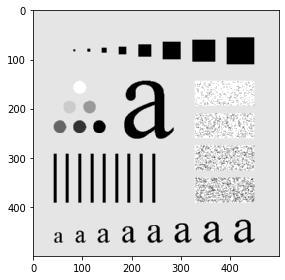

In [19]:
image_ori=io.imread('blurred.tif')
image=rgb2gray(image_ori)
io.imshow (image)
sh= image.shape
row = sh[0]
col = sh[1]
sh

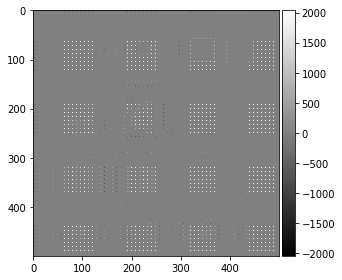

In [20]:
image_dct = np.zeros ((row,col),dtype=int)
for r in range (0,row//8):
    for c in range (0,col//8):
        image_dct[r*8:(r+1)*8, c*8:(c+1)*8]=dct2(image[r*8:(r+1)*8, c*8:(c+1)*8])
        
io.imshow (image_dct, cmap = 'gray')

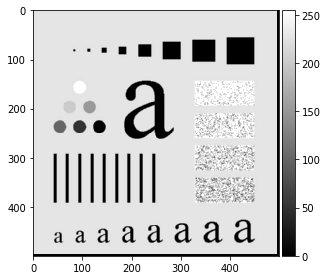

In [21]:
image_inv = np.zeros ((row,col),dtype=int)
for r in range (0,row//8):
    for c in range (0,col//8):
        image_inv[r*8:(r+1)*8, c*8:(c+1)*8]=idct2(image_dct[r*8:(r+1)*8, c*8:(c+1)*8])

io.imshow (image_inv, cmap = 'gray',vmin=0,vmax=255)

In [22]:
A = abs(image_dct)
A = A.flatten()
B = sorted (A)
B = np.array(B)
n = len (B)
P = 2
perc = int((1-P/100)*(row*col))
C = B[perc:]
thresh = np.zeros ((row,col),dtype=int)
print (image_dct)

[[1402 -277 -261 ...    0    0    0]
 [-277   55   51 ...    0    0    0]
 [-261   51   48 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [23]:
for r in range (row):
    for c in range (col):
        if image_dct[r,c] in C:
            thresh[r,c]=image_dct[r,c]

thresh

array([[1402,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

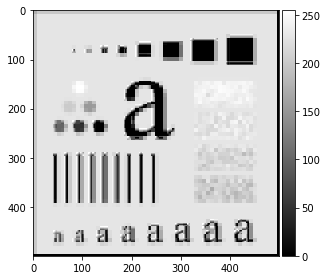

In [24]:
image_inv2 = np.zeros ((row,col),dtype=int)
for r in range (0,row//8):
    for c in range (0,col//8):
        image_inv2[r*8:(r+1)*8, c*8:(c+1)*8]=idct2(thresh[r*8:(r+1)*8, c*8:(c+1)*8])

io.imshow (image_inv2, cmap = 'gray',vmin=0,vmax=255)


In [25]:
nz= np.sum ([thresh!=0])
nz

4184

In [26]:
CR = (row*col)/nz
CR

59.751434034416825

CONCLUSION:

Basic idea of transform coding is to compact most information in a source sequence into a few elements of the transformed sequence using reversible transform and then discarding the elements of the sequence that do not contain much information to obtain compression. Maximum compaction can be obtained if the transform used can decorrelate the input sequence. Here, we observe that even if only 2% of the maximum information is preserved, the image after compression is still readable, hence providing a larger compression ratio of 59.7. 